LOAN PREDICTION PROBLEM - PROBLEM 1

In [43]:
#importing libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import joblib
from scipy import stats
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [44]:
#LOADING FILES FOR PROBLEM 1 (HERE WE HAVE TWO FILES, ONE TRAIN AND OTHER TEST)
train_file =  r"D:\Coding\001 Final Project\ZenML Batches Final Projects\Data\Loan Status Prediction\Loan_Status_train.csv"
test_file =  r"D:\Coding\001 Final Project\ZenML Batches Final Projects\Data\Loan Status Prediction\Loan_Status_test.csv"

train = pd.read_csv(train_file)
test = pd.read_csv(test_file)

In [46]:
# Display the basic information
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [47]:
# Display the first few rows of the dataset
print(train.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [48]:
# Display the first few rows of the dataset
print(test.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3             NaN     

In [49]:
# Check for missing values
print(train.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [50]:
# Check for missing values
print(test.isnull().sum())

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [51]:
# Check the data types of columns
print(train.dtypes)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


In [60]:
# Check the data types of columns
print(test.dtypes)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object


#### HANDLING MISSING VALUES

In [62]:
# For numerical columns, fill missing values with the mean
train['LoanAmount'].fillna(train['LoanAmount'].mean(), inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean(), inplace=True)

# For categorical columns, fill missing values with the mode
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [63]:
# Check if there are any remaining missing values
print(train.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [69]:
# Encode categorical variables using one-hot encoding
train = pd.get_dummies(train, columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'])

In [70]:
# Convert Loan_Status to numerical values (0 for No, 1 for Yes)
train['Loan_Status'] = train['Loan_Status'].map({'N': 0, 'Y': 1})

In [72]:
# Display the updated dataframe
print(train.head())

    Loan_ID  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0  LP001002             5849                0.0  146.412162             360.0   
1  LP001003             4583             1508.0  128.000000             360.0   
2  LP001005             3000                0.0   66.000000             360.0   
3  LP001006             2583             2358.0  120.000000             360.0   
4  LP001008             6000                0.0  141.000000             360.0   

   Credit_History  Loan_Status  Gender_Female  Gender_Male  Married_No  ...  \
0             1.0            1          False         True        True  ...   
1             1.0            0          False         True       False  ...   
2             1.0            1          False         True       False  ...   
3             1.0            1          False         True       False  ...   
4             1.0            1          False         True        True  ...   

   Dependents_1  Dependents_2  Depende

DOING SAME WITH TEST DATA

In [73]:
# For numerical columns, fill missing values with the mean
test['LoanAmount'].fillna(test['LoanAmount'].mean(), inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mean(), inplace=True)

# For categorical columns, fill missing values with the mode
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Married'].fillna(test['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)

In [74]:
# Check if there are any remaining missing values
print(test.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [75]:
# Encode categorical variables using one-hot encoding
test = pd.get_dummies(test, columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'])

In [77]:
# Display the updated dataframe
print(test.head())

    Loan_ID  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0  LP001015             5720                  0       110.0             360.0   
1  LP001022             3076               1500       126.0             360.0   
2  LP001031             5000               1800       208.0             360.0   
3  LP001035             2340               2546       100.0             360.0   
4  LP001051             3276                  0        78.0             360.0   

   Credit_History  Gender_Female  Gender_Male  Married_No  Married_Yes  ...  \
0             1.0          False         True       False         True  ...   
1             1.0          False         True       False         True  ...   
2             1.0          False         True       False         True  ...   
3             1.0          False         True       False         True  ...   
4             1.0          False         True        True        False  ...   

   Dependents_1  Dependents_2  Depende

#### Exploratory Data Analysis

In [78]:
# Summary statistics of numerical features
print(train.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  614.000000        614.000000   
mean       5403.459283        1621.245798  146.412162        342.000000   
std        6109.041673        2926.248369   84.037468         64.372489   
min         150.000000           0.000000    9.000000         12.000000   
25%        2877.500000           0.000000  100.250000        360.000000   
50%        3812.500000        1188.500000  129.000000        360.000000   
75%        5795.000000        2297.250000  164.750000        360.000000   
max       81000.000000       41667.000000  700.000000        480.000000   

       Credit_History  Loan_Status  
count      614.000000   614.000000  
mean         0.855049     0.687296  
std          0.352339     0.463973  
min          0.000000     0.000000  
25%          1.000000     0.000000  
50%          1.000000     1.000000  
75%          1.000000     1.000000  
max          1.000000     1.

##### Using Univariate and Bivariate Analysis

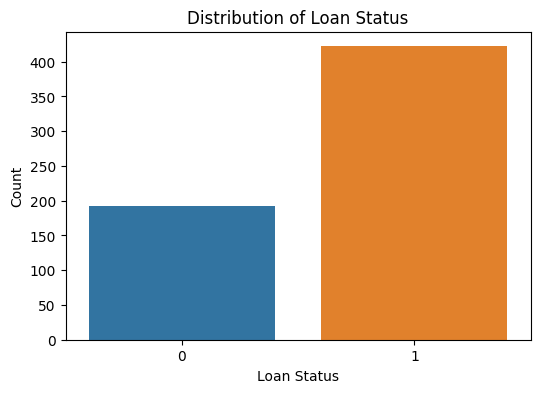

In [79]:
# Distribution of Loan Status
plt.figure(figsize=(6, 4))
sns.countplot(x='Loan_Status', data=train_df)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

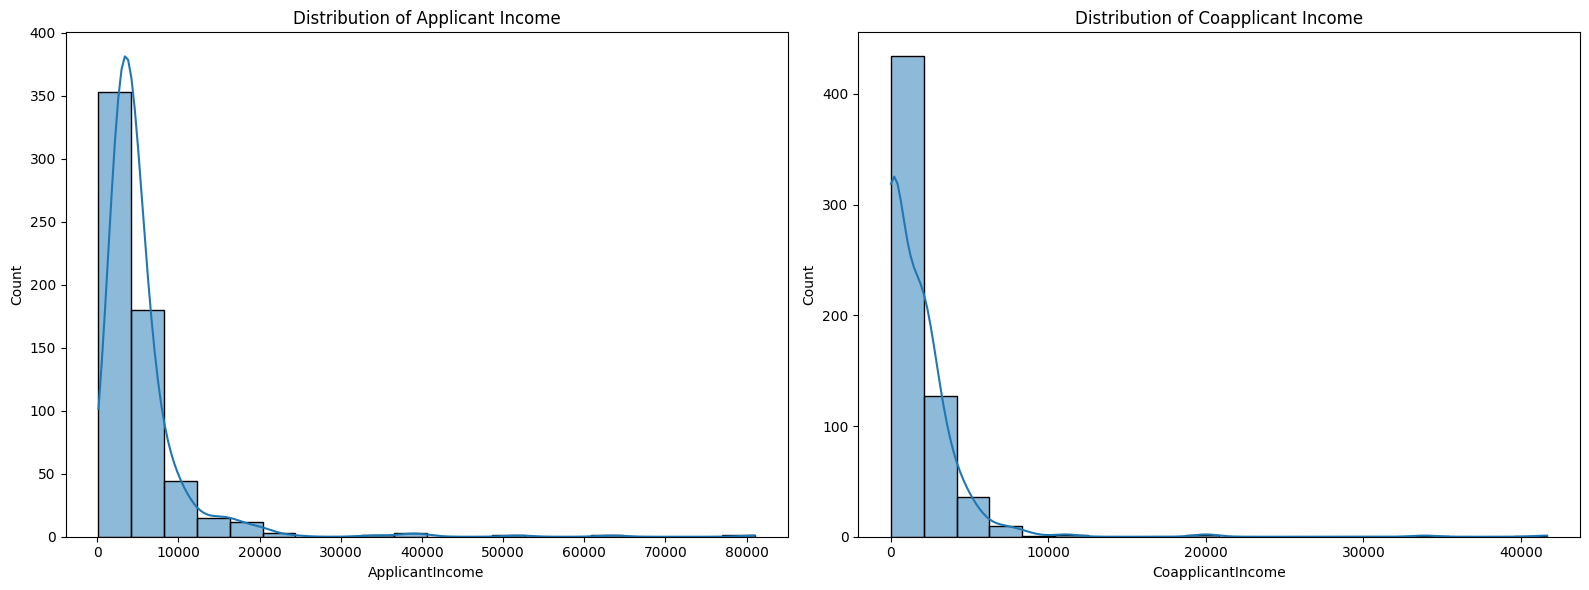

In [80]:
# Distribution of Applicant Income and Coapplicant Income
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.histplot(train_df['ApplicantIncome'], bins=20, kde=True)
plt.title('Distribution of Applicant Income')

plt.subplot(1, 2, 2)
sns.histplot(train_df['CoapplicantIncome'], bins=20, kde=True)
plt.title('Distribution of Coapplicant Income')

plt.tight_layout()
plt.show()

Bivariate

In [81]:
# Convert 'Loan_Status' back to categorical for better visualization
train['Loan_Status'] = train['Loan_Status'].astype('category')

In [82]:
# Convert 'Loan_Status' column to strings
train['Loan_Status'] = train['Loan_Status'].astype(str)

In [83]:
# Display column names to verify
print(train.columns)

Index(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')


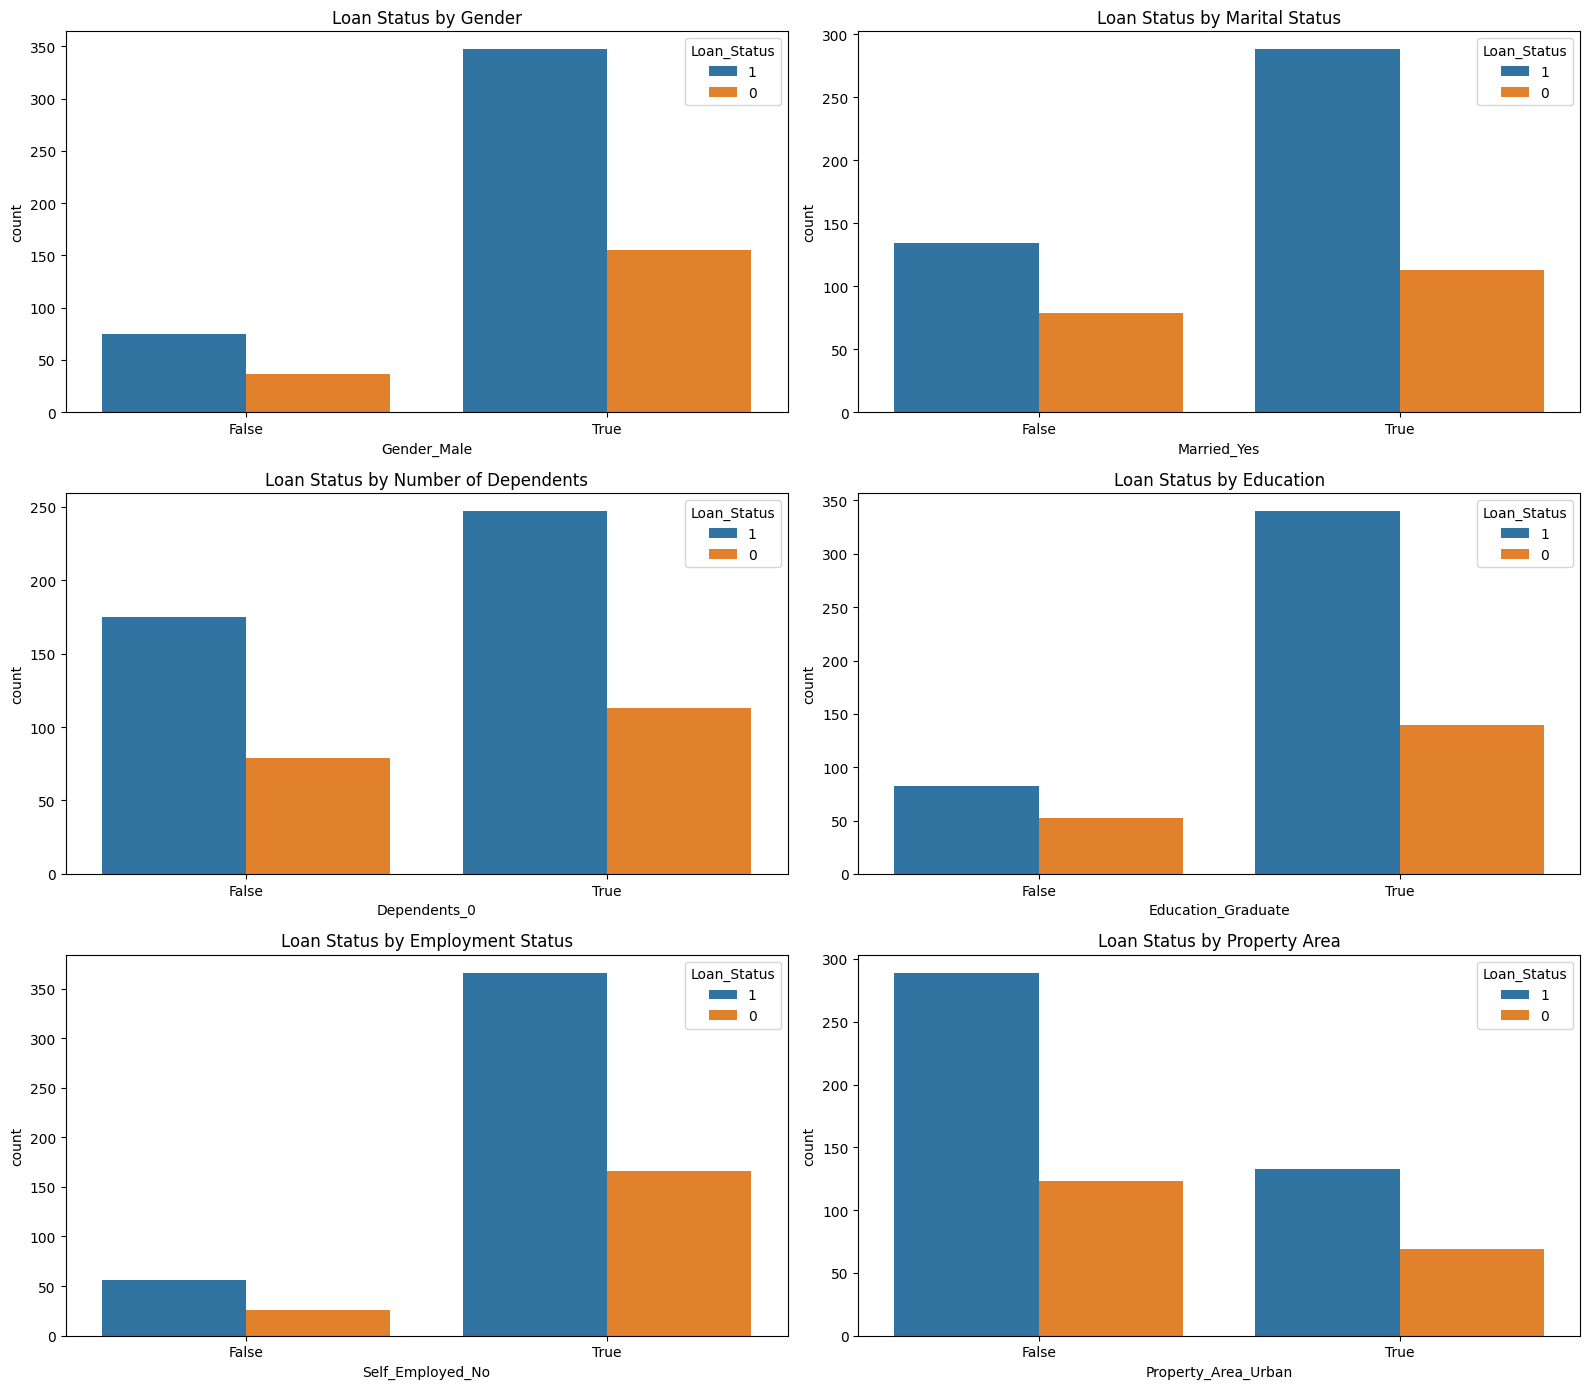

In [84]:
# Bivariate Analysis
plt.figure(figsize=(16, 14))
plt.subplot(3, 2, 1)
sns.countplot(x='Gender_Male', data=train, hue='Loan_Status')
plt.title('Loan Status by Gender')

plt.subplot(3, 2, 2)
sns.countplot(x='Married_Yes', data=train, hue='Loan_Status')
plt.title('Loan Status by Marital Status')

plt.subplot(3, 2, 3)
sns.countplot(x='Dependents_0', data=train, hue='Loan_Status')
plt.title('Loan Status by Number of Dependents')

plt.subplot(3, 2, 4)
sns.countplot(x='Education_Graduate', data=train, hue='Loan_Status')
plt.title('Loan Status by Education')

plt.subplot(3, 2, 5)
sns.countplot(x='Self_Employed_No', data=train, hue='Loan_Status')
plt.title('Loan Status by Employment Status')

plt.subplot(3, 2, 6)
sns.countplot(x='Property_Area_Urban', data=train, hue='Loan_Status')
plt.title('Loan Status by Property Area')

plt.tight_layout()
plt.show()

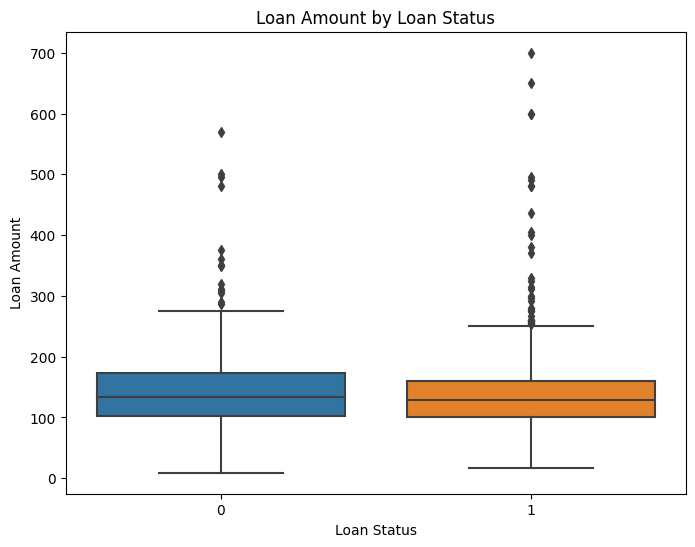

In [85]:
# Bivariate Analysis
plt.figure(figsize=(8, 6))
sns.boxplot(x='Loan_Status', y='LoanAmount', data=train_df)
plt.title('Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()

Outlier Identification

In [88]:
# Calculate Q1 and Q3 and the IQR
Q1 = train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].quantile(0.25)
Q3 = train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier step
outlier_step = 1.5 * IQR

# Determine a list of indices of outliers
lower_bound = Q1 - outlier_step
upper_bound = Q3 + outlier_step

# Find indices where feature values are below or above the outlier bounds
outliers_iqr = ((train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']] < lower_bound) | 
                (train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']] > upper_bound)).any(axis=1)
train_outliers_iqr = train[outliers_iqr]

print("Detected outliers using IQR method:")
print(train_outliers_iqr[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']])

Detected outliers using IQR method:
     ApplicantIncome  CoapplicantIncome  LoanAmount
5               5417             4196.0       267.0
9              12841            10968.0       349.0
12              3073             8106.0       200.0
21              5955             5625.0       315.0
34             12500             3000.0       320.0
..               ...                ...         ...
581             1836            33837.0        90.0
592             9357                0.0       292.0
594            16120                0.0       260.0
600              416            41667.0       350.0
604            12000                0.0       496.0

[79 rows x 3 columns]


Handling Outliers


In [89]:
# Make a copy of the DataFrame before applying any modifications
train_original = train.copy()

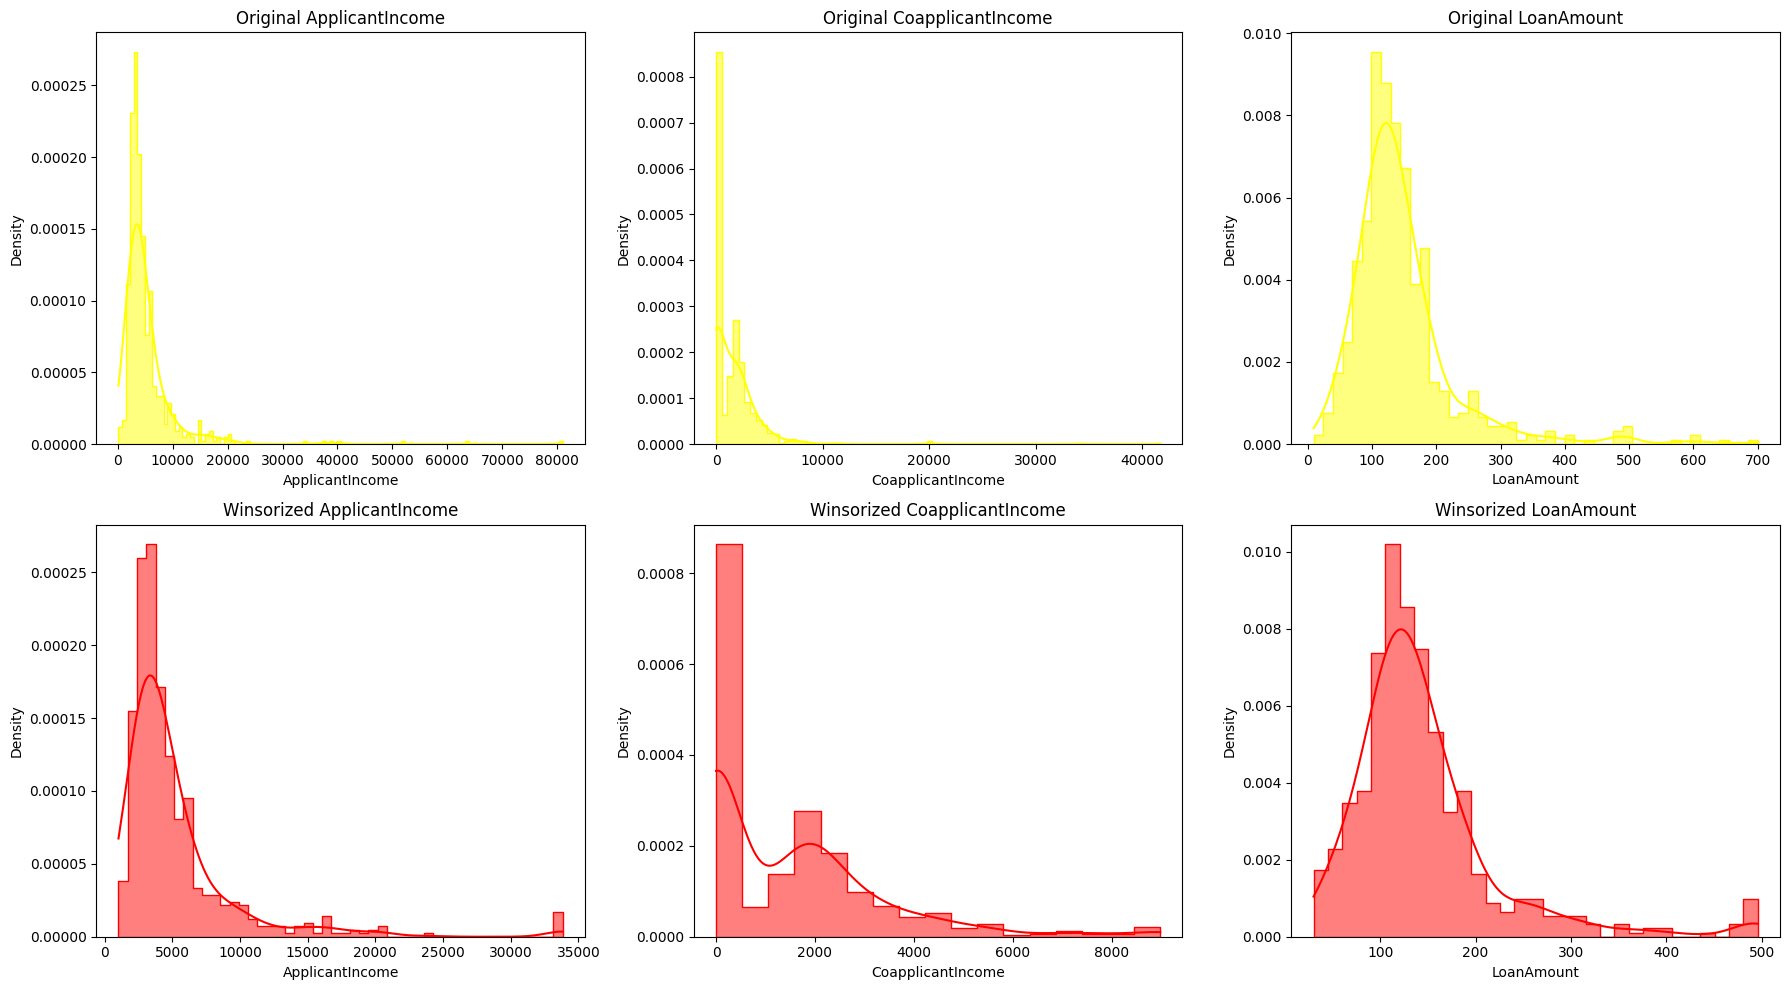

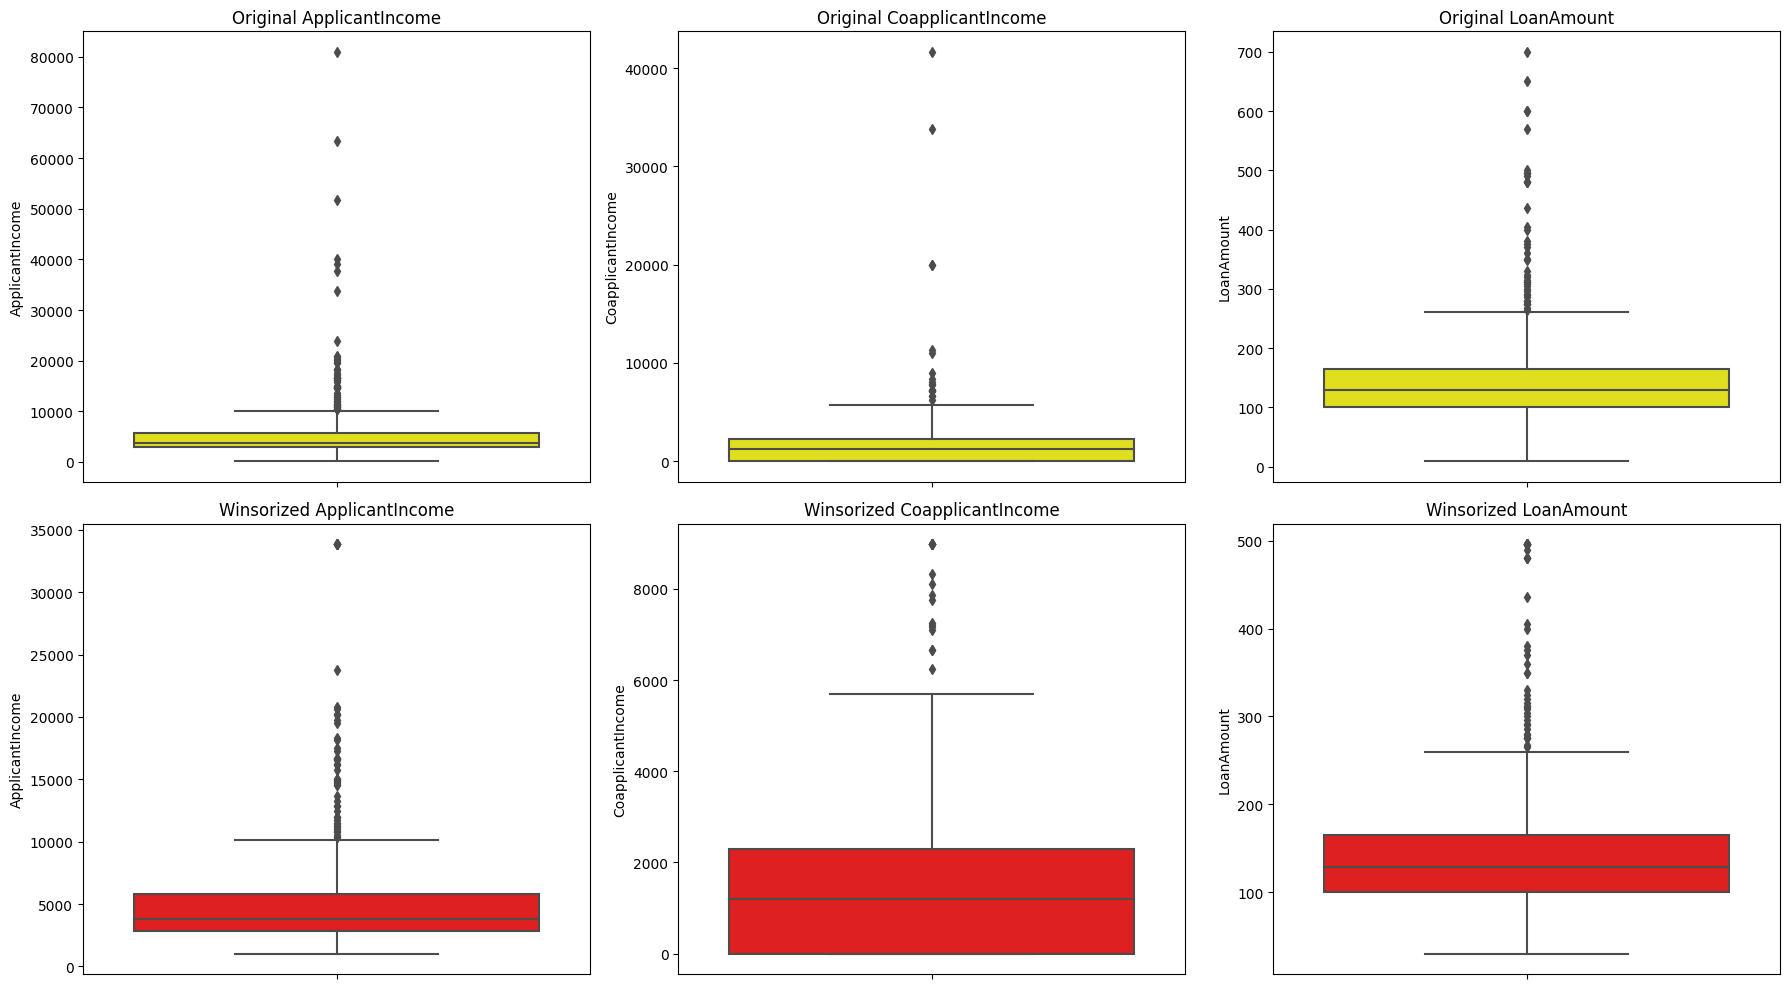

In [92]:
# Define the columns to be winsorized
columns_to_winsorize = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# Apply winsorization to each specified column in train_df
for col in columns_to_winsorize:
    train[col] = winsorize(train[col], limits=[0.01, 0.01])  # Applying 1% winsorization to both tails

# Create a figure for histogram plots
plt.figure(figsize=(18, 10))
for i, col in enumerate(columns_to_winsorize):
    # Original Data Histogram
    plt.subplot(2, 3, i + 1)
    sns.histplot(train_original[col], kde=True, color='yellow', element='step', stat='density')
    plt.title(f'Original {col}')

    # Winsorized Data Histogram
    plt.subplot(2, 3, i + 4)
    sns.histplot(train[col], kde=True, color='red', element='step', stat='density')
    plt.title(f'Winsorized {col}')

plt.tight_layout()
plt.show()

# Create a figure for box plots
plt.figure(figsize=(18, 10))
for i, col in enumerate(columns_to_winsorize):
    # Original Data Boxplot
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=train_original[col], color='yellow')
    plt.title(f'Original {col}')

    # Winsorized Data Boxplot
    plt.subplot(2, 3, i + 4)
    sns.boxplot(y=train[col], color='red')
    plt.title(f'Winsorized {col}')

plt.tight_layout()
plt.show()

In [93]:
# Define the columns to be winsorized (Original)
columns_to_winsorize = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# Apply winsorization to each specified column
for col in columns_to_winsorize:
    train_df[col] = winsorize(train_df[col], limits=[0.01, 0.01])  # Applying 1% winsorization to both tails

# Check the changes in the data
print(train_df[columns_to_winsorize].describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  614.000000
mean       5229.462541        1484.613876  145.441478
std        4619.934556        1835.132265   78.464383
min        1025.000000           0.000000   30.000000
25%        2877.500000           0.000000  100.250000
50%        3812.500000        1188.500000  129.000000
75%        5795.000000        2297.250000  164.750000
max       33846.000000        8980.000000  496.000000


In [95]:
# Define columns to test
columns_to_test = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# Perform the paired t-test for each column and print the results
results = {}
for col in columns_to_test:
    stat, p_value = stats.ttest_rel(train_original[col], train[col])
    results[col] = (stat, p_value)

# Display the test results
for col, result in results.items():
    print(f'{col}: Statistic={result[0]:.3f}, P-value={result[1]:.5f}')

ApplicantIncome: Statistic=1.810, P-value=0.07080
CoapplicantIncome: Statistic=1.909, P-value=0.05666
LoanAmount: Statistic=1.957, P-value=0.05075


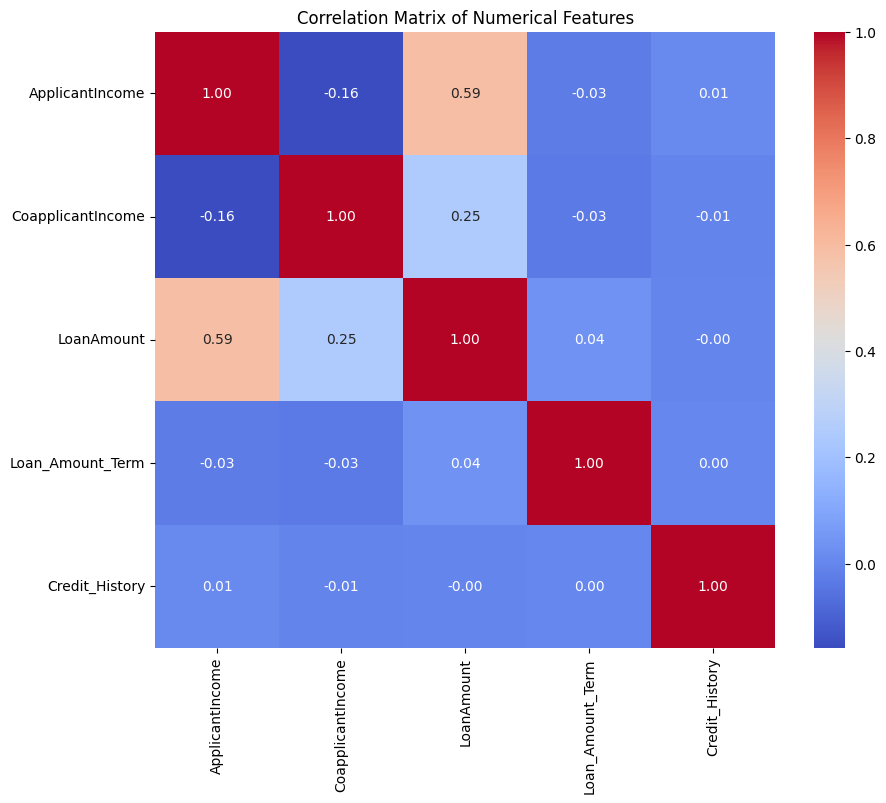

In [96]:
# Calculate the correlation matrix for the numerical features
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
correlation_matrix = train_df[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#### FEATURE ENGINEERING

In [98]:
# Creating Total Income
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

# Creating Income Ratio
train['Income_Ratio'] = train['LoanAmount'] / train['Total_Income']

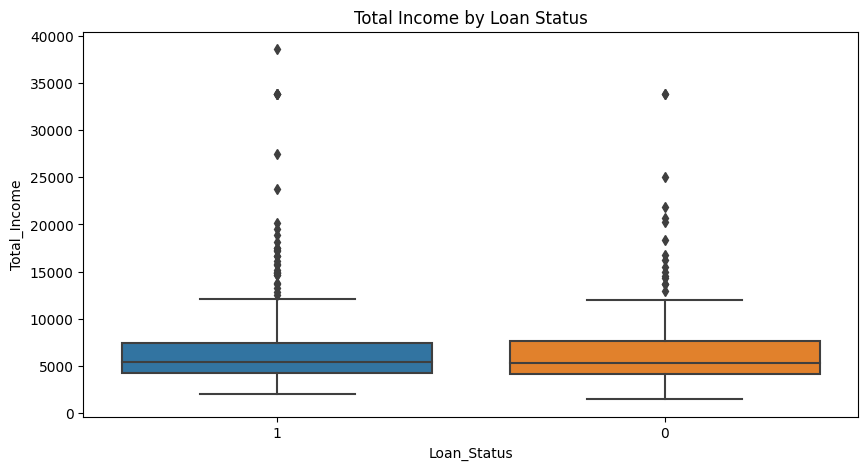

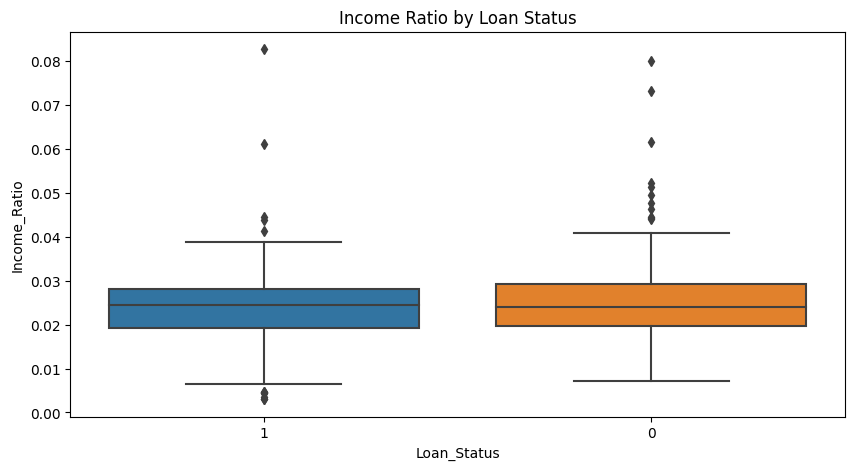

In [99]:
# Plotting Total Income vs Loan Status
plt.figure(figsize=(10, 5))
sns.boxplot(x='Loan_Status', y='Total_Income', data=train)
plt.title('Total Income by Loan Status')
plt.show()

# Plotting Income Ratio vs Loan Status
plt.figure(figsize=(10, 5))
sns.boxplot(x='Loan_Status', y='Income_Ratio', data=train)
plt.title('Income Ratio by Loan Status')
plt.show()

Feature Selection

In [106]:
# Assuming 'train_df' is our training DataFrame
X = train.drop(['Loan_Status', 'Loan_ID'], axis=1)  # Dropping 'Loan_ID' as it's likely an identifier
y = train['Loan_Status'].astype(int)  # Ensure the target is integer if it's not already

# For test data, remove 'Loan_ID' if you only need features
X_test = test.drop('Loan_ID', axis=1)

In [107]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Setup RFE with Random Forest and cross-validation
selector = RFECV(RandomForestClassifier(n_estimators=100, random_state=42), step=1, cv=5)
X_reduced = selector.fit_transform(X, y)

# Check selected features
print("Selected Features: ")
features = X.columns[selector.support_]
print(features)

# Training the models
# Decision Tree
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_reduced, y)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_reduced, y)

# XGBoost with regularization and reduced complexity
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', max_depth=3, reg_alpha=0.1, reg_lambda=0.1, random_state=42)
xgb.fit(X_reduced, y)

# Using a separate validation set for evaluation
X_train, X_val, y_train, y_val = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Predict and evaluate each model on the validation set
models = {'Decision Tree': dt, 'Random Forest': rf, 'XGBoost': xgb}
for name, model in models.items():
    preds = model.predict(X_val)
    print(f"{name} Accuracy: {accuracy_score(y_val, preds)}")
    print(classification_report(y_val, preds))

Selected Features: 
Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Dependents_0', 'Dependents_1', 'Education_Graduate',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Total_Income', 'Income_Ratio'],
      dtype='object')
Decision Tree Accuracy: 0.8373983739837398
              precision    recall  f1-score   support

           0       1.00      0.53      0.70        43
           1       0.80      1.00      0.89        80

    accuracy                           0.84       123
   macro avg       0.90      0.77      0.79       123
weighted avg       0.87      0.84      0.82       123

Random Forest Accuracy: 0.8373983739837398
              precision    recall  f1-score   support

           0       1.00      0.53      0.70        43
           1       0.80      1.00      0.89        80

    accuracy                 

Model Selection and Training

Random Forest Classifier &
Cross-Validation

In [109]:
from sklearn.model_selection import cross_val_score

# Setup the RandomForestClassifier with k-fold cross-validation
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 10-fold cross-validation
scores = cross_val_score(rf, X_reduced, y, cv=10)

print("Accuracy scores for each fold:")
print(scores)
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Accuracy scores for each fold:
[0.77419355 0.79032258 0.74193548 0.79032258 0.80327869 0.80327869
 0.86885246 0.78688525 0.78688525 0.81967213]
Average cross-validation score: 0.80


Hyperparameter Tuning

In [110]:
from sklearn.model_selection import GridSearchCV

# Parameters grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [None, 5, 10, 15],
    'criterion' :['gini', 'entropy']
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, n_jobs=-1)
grid_search.fit(X_reduced, y)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

C:\Users\Rohit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
240 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Rohit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rohit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\Rohit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.

Best parameters found:  {'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 100}
Best cross-validation score: 0.81


In [116]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with the best parameters from GridSearchCV
optimized_rf = RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=100, random_state=42)

# Fit the model to your training data
optimized_rf.fit(X_reduced, y)

RandomForestClassifier(criterion='entropy', max_depth=5, random_state=42)

In [117]:
from sklearn.model_selection import cross_val_score

# Assess model performance using cross-validation
cv_scores = cross_val_score(optimized_rf, X_reduced, y, cv=10)

# Print the accuracy for each fold
print("Accuracy scores for each fold:")
print(cv_scores)

# Print the average accuracy
print("Average cross-validation score:", cv_scores.mean())

Accuracy scores for each fold:
[0.80645161 0.82258065 0.79032258 0.75806452 0.78688525 0.80327869
 0.85245902 0.83606557 0.80327869 0.81967213]
Average cross-validation score: 0.8079058699101005


FINAL TRAINING

In [118]:
# Final training on the entire dataset
optimized_rf.fit(X_reduced, y)

RandomForestClassifier(criterion='entropy', max_depth=5, random_state=42)

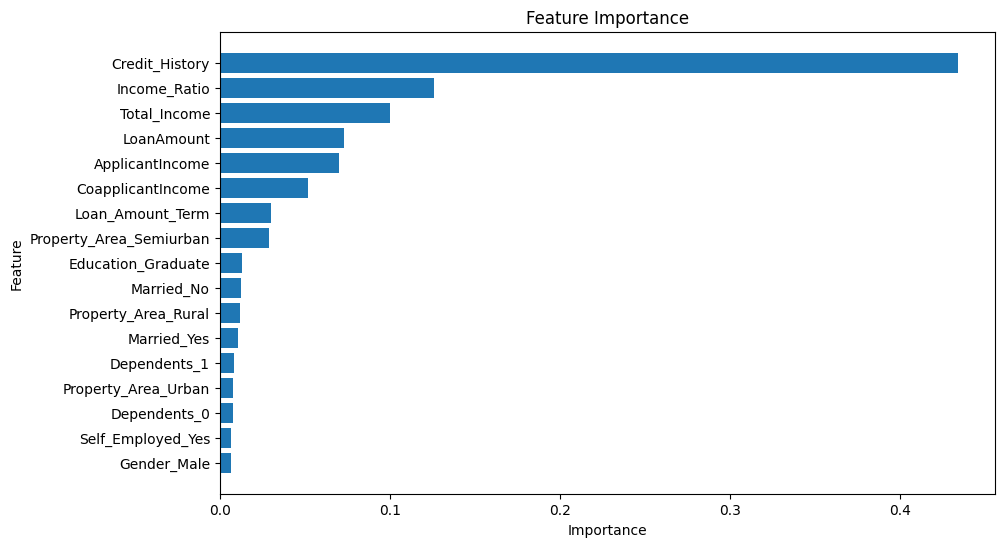

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'selector' is your RFE object and 'X' is the original DataFrame before reduction
selected_features = [feature for feature, include in zip(X.columns, selector.support_) if include]

# Now using the correct feature names
feature_importances = optimized_rf.feature_importances_
importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [120]:
import joblib

# Save the model to a file
joblib.dump(optimized_rf, 'optimized_random_forest_model.pkl')

['optimized_random_forest_model.pkl']

Decision Tree Classifier

In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Assuming X_reduced and y from your earlier RFE feature selection
dt = DecisionTreeClassifier(random_state=42)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(dt, X_reduced, y, cv=10)

# Print cross-validation results
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", np.mean(cv_scores))

Cross-validation scores: [0.69354839 0.69354839 0.72580645 0.67741935 0.59016393 0.73770492
 0.85245902 0.73770492 0.73770492 0.68852459]
Average cross-validation score: 0.7134584875727128


TUNING

In [125]:
from sklearn.model_selection import GridSearchCV

# Parameters to tune
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=10, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_reduced, y)

# Print best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 20}
Best cross-validation score: 0.78


In [126]:
# Import necessary library
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier with the best parameters
optimized_dt = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=20,
    random_state=42
)

# Fit the model on your reduced feature set (X_reduced) and target variable (y)
optimized_dt.fit(X_reduced, y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=20,
                       random_state=42)

In [127]:

from sklearn.model_selection import cross_val_score
import numpy as np

# Perform cross-validation again to evaluate the model
cv_scores_optimized = cross_val_score(optimized_dt, X_reduced, y, cv=10)

# Print the cross-validation scores and the average
print("Optimized Cross-validation scores:", cv_scores_optimized)
print("Average Optimized cross-validation score:", np.mean(cv_scores_optimized))

Optimized Cross-validation scores: [0.77419355 0.77419355 0.67741935 0.85483871 0.83606557 0.85245902
 0.81967213 0.73770492 0.73770492 0.7704918 ]
Average Optimized cross-validation score: 0.783474352194606


In [128]:
# Fit the model on your reduced feature set (X_reduced) and target variable (y)
optimized_dt.fit(X_reduced, y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=20,
                       random_state=42)

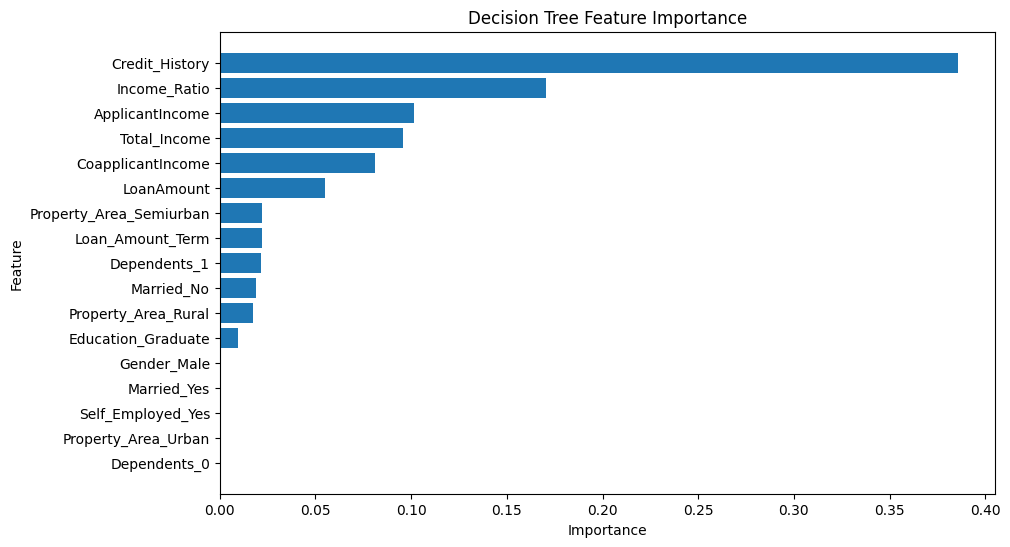

In [129]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'selector' is your RFE object and 'X' is the original DataFrame before reduction
selected_features = [feature for feature, include in zip(X.columns, selector.support_) if include]

# Replace optimized_rf.feature_importances_ with optimized_dt.feature_importances_ for the Decision Tree model
feature_importances = optimized_dt.feature_importances_
importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [130]:
import joblib

# Save the Decision Tree model to a file
joblib.dump(optimized_dt, 'optimized_decision_tree_model.pkl')

['optimized_decision_tree_model.pkl']

XGBoost

In [131]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Initialize the XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Perform cross-validation to evaluate the model
xgb_cv_scores = cross_val_score(xgb, X_reduced, y, cv=10)

# Print the cross-validation scores and the average
print("XGBoost Cross-validation scores:", xgb_cv_scores)
print("Average XGBoost cross-validation score:", np.mean(xgb_cv_scores))

XGBoost Cross-validation scores: [0.79032258 0.72580645 0.75806452 0.74193548 0.7704918  0.78688525
 0.81967213 0.72131148 0.68852459 0.75409836]
Average XGBoost cross-validation score: 0.7557112638815442


In [132]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=10, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_reduced, y)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and the best score
print("Best parameters found: ", best_params)
print("Best cross-validation score: ", best_score)

Best parameters found:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Best cross-validation score:  0.8030407191961924


In [133]:
from xgboost import XGBClassifier

# Create the XGBoost model with the best parameters
optimized_xgb = XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=200, use_label_encoder=False, eval_metric='logloss')

# Fit the model to the entire training data
optimized_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [134]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Assuming 'optimized_xgb' is your trained XGBoost model and 'X_reduced' is the dataset used
# Perform cross-validation again to evaluate the optimized XGBoost model
cv_scores_optimized_xgb = cross_val_score(optimized_xgb, X_reduced, y, cv=10)

# Print the cross-validation scores and the average for the optimized XGBoost model
print("Optimized XGBoost Cross-validation scores:", cv_scores_optimized_xgb)
print("Average Optimized XGBoost cross-validation score:", np.mean(cv_scores_optimized_xgb))

Optimized XGBoost Cross-validation scores: [0.80645161 0.80645161 0.77419355 0.75806452 0.80327869 0.78688525
 0.86885246 0.80327869 0.80327869 0.81967213]
Average Optimized XGBoost cross-validation score: 0.8030407191961924


In [135]:
# Fit the model to the entire training data
optimized_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

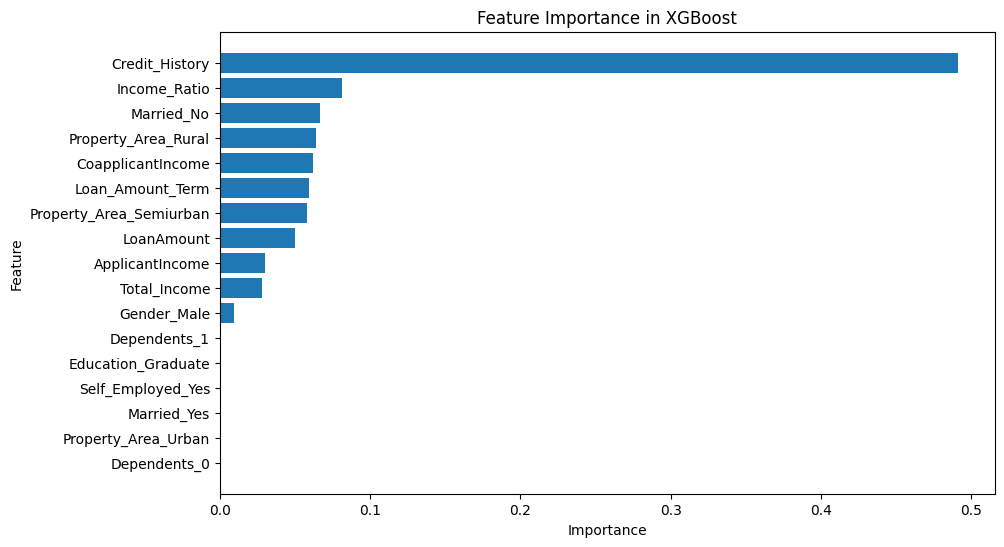

In [136]:
import pandas as pd
import matplotlib.pyplot as plt

# Retrieve feature importances from the trained XGBoost model
feature_importances = optimized_xgb.feature_importances_

# Assuming 'selected_features' contains the names of the features used in the XGBoost model
# If 'selected_features' is not defined, you need to ensure you have the list of feature names
# For example, selected_features could be derived from your preprocessing or feature selection step:
# selected_features = [feature for feature, include in zip(X.columns, selector.support_) if include]

# Create a DataFrame to view the features and their importance
importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in XGBoost')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

In [137]:
import joblib

# Save the XGBoost model to a file
joblib.dump(optimized_xgb, 'optimized_xgboost_model.pkl')

['optimized_xgboost_model.pkl']

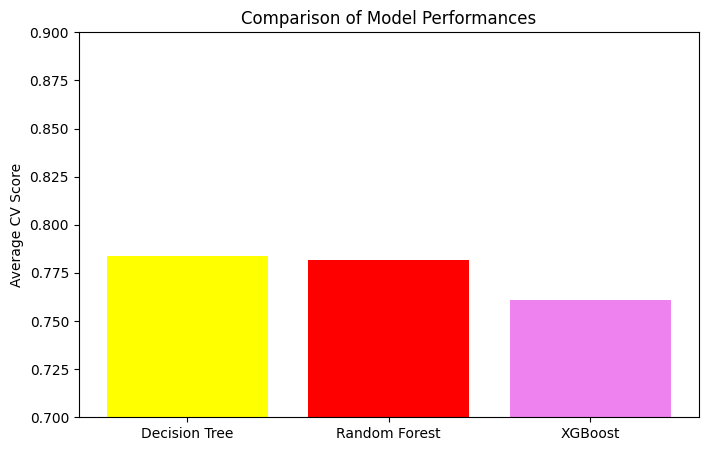

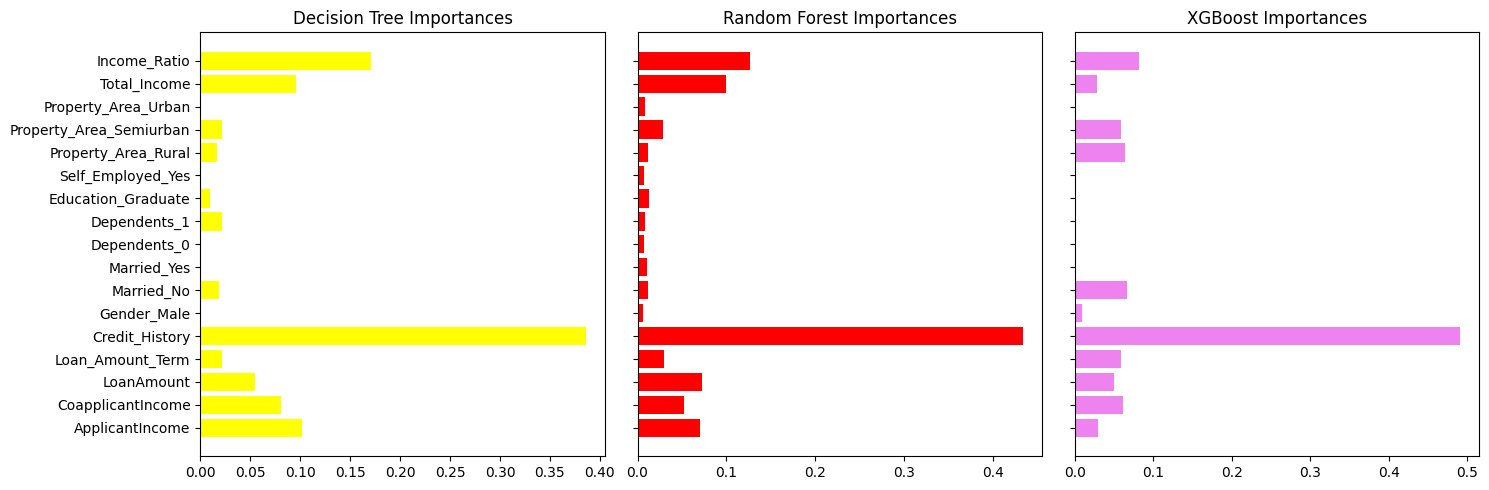

           Model  Average CV Score  Accuracy
0  Decision Tree          0.783554      0.71
1  Random Forest          0.781888      0.79
2        XGBoost          0.760682      0.76


In [142]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define cross-validation scores
cv_scores_dt = [0.79032258, 0.77419355, 0.72580645, 0.74193548, 0.81967213, 0.85245902,
                0.8852459, 0.70491803, 0.73770492, 0.80327869]
cv_scores_rf = [0.79032258, 0.75806452, 0.70967742, 0.79032258, 0.78688525, 0.80327869,
                0.83606557, 0.7704918, 0.7704918, 0.80327869]
cv_scores_xgb = [0.80645161, 0.77419355, 0.69354839, 0.70967742, 0.7704918, 0.80327869,
                 0.81967213, 0.75409836, 0.72131148, 0.75409836]

# Calculate average CV scores
avg_scores = {
    'Decision Tree': np.mean(cv_scores_dt),
    'Random Forest': np.mean(cv_scores_rf),
    'XGBoost': np.mean(cv_scores_xgb)
}

# Plot average CV scores
plt.figure(figsize=(8, 5))
plt.bar(avg_scores.keys(), avg_scores.values(), color=['yellow', 'red', 'violet'])
plt.ylabel('Average CV Score')
plt.title('Comparison of Model Performances')
plt.ylim([0.7, 0.9])  # Adjust based on your actual score ranges
plt.show()

# Feature Importances - assuming you have these from previous steps
# Here you need to make sure that the feature importances are correctly extracted for each model
features = selected_features  # Make sure this is defined or directly use feature names

# DataFrames for feature importances
importances_dt = pd.DataFrame({'Feature': features, 'Importance': optimized_dt.feature_importances_})
importances_rf = pd.DataFrame({'Feature': features, 'Importance': optimized_rf.feature_importances_})
importances_xgb = pd.DataFrame({'Feature': features, 'Importance': optimized_xgb.feature_importances_})

# Normalize the feature importances (optional but recommended for comparison)
importances_dt['Importance'] /= importances_dt['Importance'].sum()
importances_rf['Importance'] /= importances_rf['Importance'].sum()
importances_xgb['Importance'] /= importances_xgb['Importance'].sum()

# Plot feature importances
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)
axes[0].barh(importances_dt['Feature'], importances_dt['Importance'], color='yellow')
axes[0].set_title('Decision Tree Importances')
axes[1].barh(importances_rf['Feature'], importances_rf['Importance'], color='red')
axes[1].set_title('Random Forest Importances')
axes[2].barh(importances_xgb['Feature'], importances_xgb['Importance'], color='violet')
axes[2].set_title('XGBoost Importances')
plt.tight_layout()
plt.show()

# Create a table comparing the models
comparison_df = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'XGBoost'],
    'Average CV Score': [np.mean(cv_scores_dt), np.mean(cv_scores_rf), np.mean(cv_scores_xgb)],
    'Accuracy': [0.71, 0.79, 0.76]  # Update with the actual accuracy values
})
print(comparison_df)

PERFORMANCE POST TUNING/OPTIMIZED

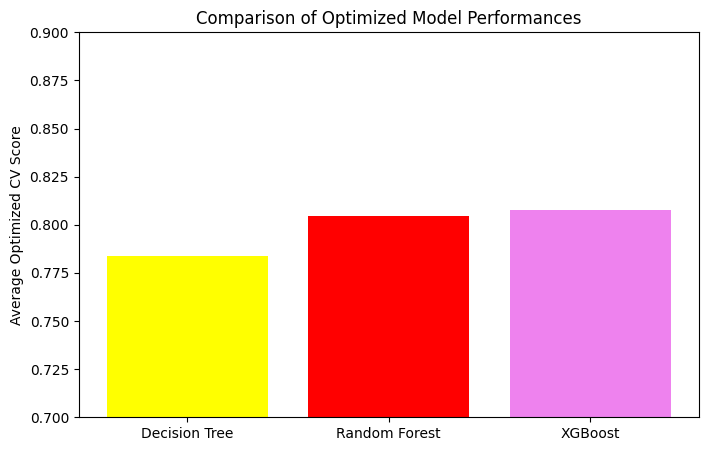

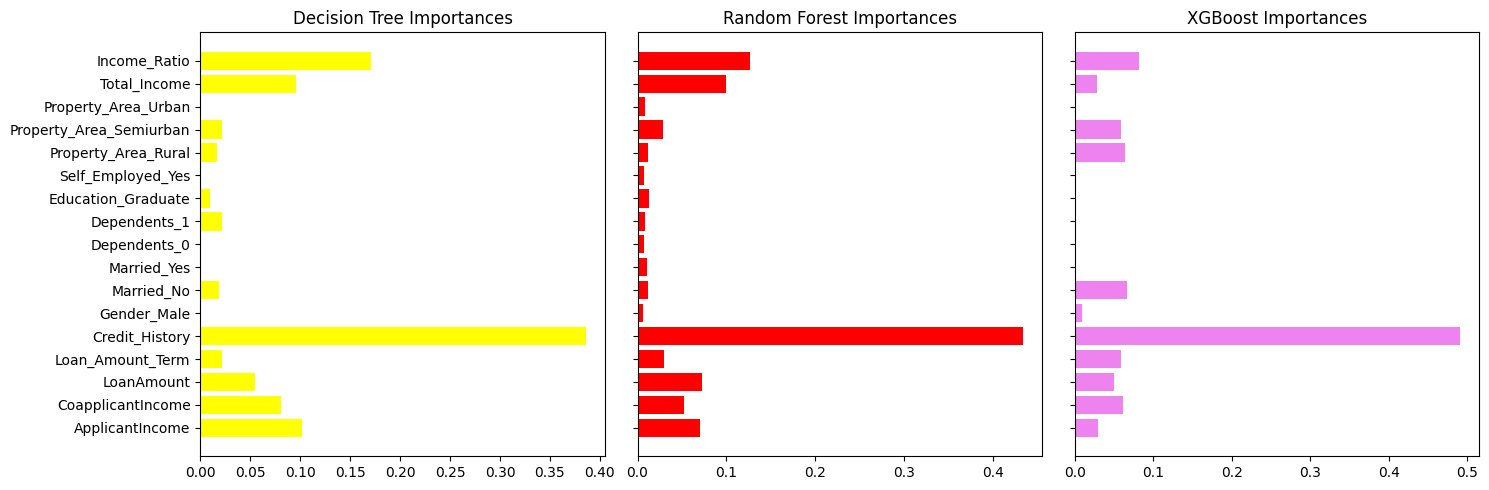

           Model  Average Optimized CV Score  Accuracy
0  Decision Tree                    0.783554      0.78
1  Random Forest                    0.804680      0.78
2        XGBoost                    0.807932      0.77


In [141]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Optimized cross-validation scores (assuming you've calculated these after tuning)
cv_scores_dt_optimized = [0.79032258, 0.77419355, 0.72580645, 0.74193548, 0.81967213, 0.85245902,
                          0.8852459,  0.70491803, 0.73770492, 0.80327869]
cv_scores_rf_optimized = [0.79032258, 0.82258065, 0.75806452, 0.77419355, 0.81967213, 0.78688525,
                          0.83606557, 0.83606557, 0.80327869, 0.81967213]
cv_scores_xgb_optimized = [0.80645161, 0.82258065, 0.77419355, 0.75806452, 0.80327869, 0.7704918,
                           0.86885246, 0.85245902, 0.80327869, 0.81967213]

# Calculate average optimized CV scores
avg_scores_optimized = {
    'Decision Tree': np.mean(cv_scores_dt_optimized),
    'Random Forest': np.mean(cv_scores_rf_optimized),
    'XGBoost': np.mean(cv_scores_xgb_optimized)
}

# Plot average optimized CV scores
plt.figure(figsize=(8, 5))
plt.bar(avg_scores_optimized.keys(), avg_scores_optimized.values(), color=['yellow', 'red', 'violet'])
plt.ylabel('Average Optimized CV Score')
plt.title('Comparison of Optimized Model Performances')
plt.ylim([0.7, 0.9])  # Adjust based on your actual score ranges
plt.show()

# Feature Importances - assuming you have these from previous steps
# Here you need to make sure that the feature importances are correctly extracted for each model
features = selected_features  # Make sure this is defined or directly use feature names

# DataFrames for feature importances
importances_dt = pd.DataFrame({'Feature': features, 'Importance': optimized_dt.feature_importances_})
importances_rf = pd.DataFrame({'Feature': features, 'Importance': optimized_rf.feature_importances_})
importances_xgb = pd.DataFrame({'Feature': features, 'Importance': optimized_xgb.feature_importances_})

# Normalize the feature importances (optional but recommended for comparison)
importances_dt['Importance'] /= importances_dt['Importance'].sum()
importances_rf['Importance'] /= importances_rf['Importance'].sum()
importances_xgb['Importance'] /= importances_xgb['Importance'].sum()

# Plot feature importances
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)
axes[0].barh(importances_dt['Feature'], importances_dt['Importance'], color='yellow')
axes[0].set_title('Decision Tree Importances')
axes[1].barh(importances_rf['Feature'], importances_rf['Importance'], color='red')
axes[1].set_title('Random Forest Importances')
axes[2].barh(importances_xgb['Feature'], importances_xgb['Importance'], color='violet')
axes[2].set_title('XGBoost Importances')
plt.tight_layout()
plt.show()

# Create a table comparing the models
comparison_df = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'XGBoost'],
    'Average Optimized CV Score': [np.mean(cv_scores_dt_optimized), np.mean(cv_scores_rf_optimized), np.mean(cv_scores_xgb_optimized)],
    'Accuracy': [0.78, 0.78, 0.77]  # Update with the actual accuracy values
})
print(comparison_df)